In [3]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [12]:
boston = load_boston()
X = boston.data
y = boston.target
print(boston.DESCR)
type(boston)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

sklearn.datasets.base.Bunch

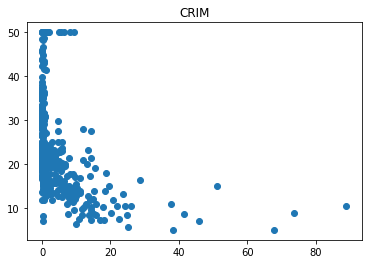

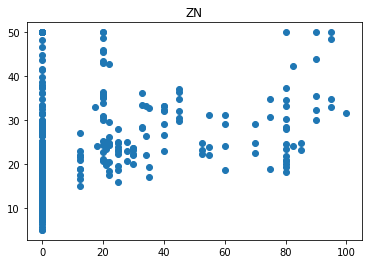

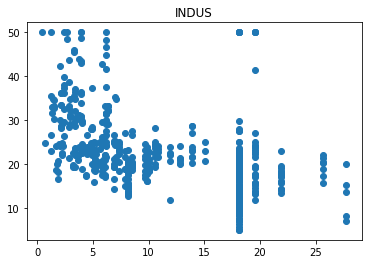

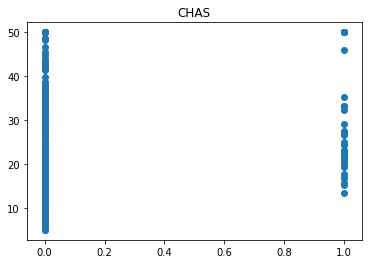

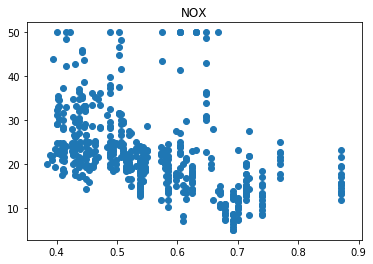

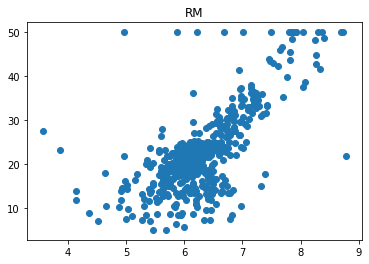

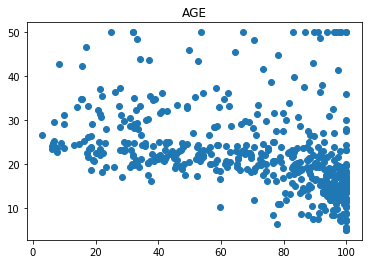

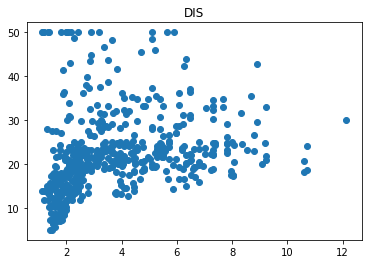

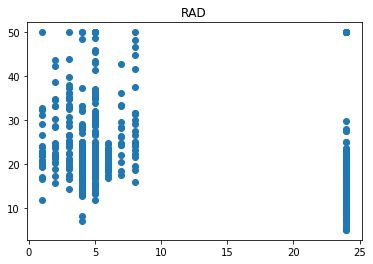

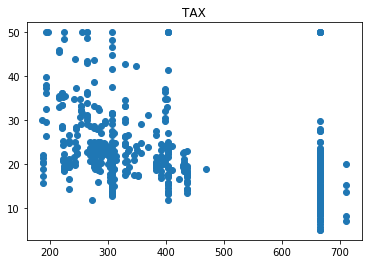

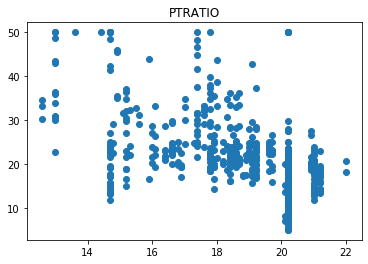

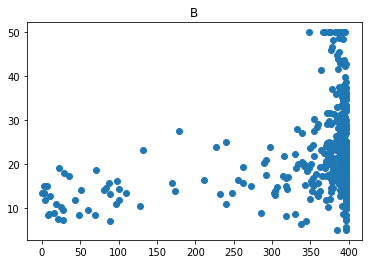

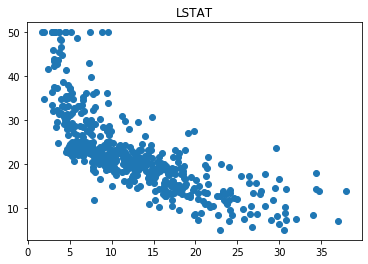

In [5]:
#Visual inspection of the data


for i in range(X.shape[1]):
    plt.scatter(X[:,i],y)
    plt.title(boston.feature_names[i])
    plt.show()

In [6]:
#Train a model
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X,y)


/Users/brajard/anaconda/envs/nn/lib/python3.6/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

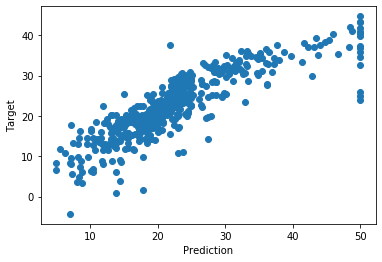

In [7]:
# Visual result
y_predict_lin = reg.predict(X)
plt.scatter(y,y_predict_lin)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

In [8]:
# Cross Validation score
from sklearn.model_selection import cross_val_score

score = cross_val_score(reg,X,y,cv = 5)
print('mean=',score.mean(),' ; std=',score.std())

mean= 0.3507413509325249  ; std= 0.3797094749826735


In [9]:
# Try a fancier model ?
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_features=10, random_state=10)
rf.fit(X,y)

/Users/brajard/anaconda/envs/nn/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

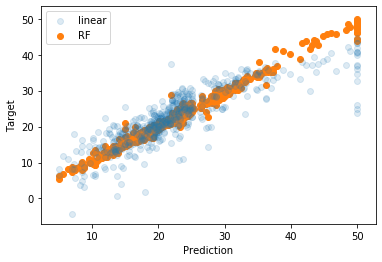

In [10]:
y_predict_rf = rf.predict(X)
plt.scatter(y,y_predict_lin,label='linear',zorder=2,alpha=.15)
plt.scatter(y,y_predict_rf,label='RF',zorder=1)
plt.legend()

plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

In [11]:
# Cross Validation score

score = cross_val_score(rf,X,y,cv = 5)
print('mean=',score.mean(),' ; std=',score.std())


mean= 0.653803201678416  ; std= 0.18439753926770808
